In [1]:
from math import *
import matplotlib.pyplot as plt
import numpy as np

In [2]:
peptides_names = "GAD1-NVT"
nions = 8
ngroups = 6
charged_names_list = ['N-terminus (1)','R-Arg (14)','R-Arg (18)','Cl$^{-}$','Cl$^{-}$','Cl$^{-}$']

In [3]:
filename = "charged_group_T240K.txt"
#plt.rc('axes', titlesize=5) 

data = []
atomID = []
distance_skip = []
nline = 0
aline = "     "

In [4]:
with open(filename) as f:
    for line in f:
        nline += 1
        ID_prev = aline[:2]
        number_prev = aline[2]
        vector_prev = aline[-3:]
        
        aline = line.strip().split()
        ID = aline[:2]
        vector = aline[-3:]

        if nline % nions == 1:
            vector = vector
        else:
            if ID_prev[1]=='O1' and ID[1]=='O2':
                atomID.pop(-1)
                data.pop(-1)
                vector[0] = (float(vector[0])+float(vector_prev[0]))/2
                vector[1] = (float(vector[1])+float(vector_prev[1]))/2
                vector[2] = (float(vector[2])+float(vector_prev[2]))/2
                ID = ID_prev + ID

            elif ID[1]!='O1' and ID[0]==ID_prev[0] and number_prev!='1':
                atomID.pop(-1)
                data.pop(-1)
                vector[0] = (float(vector[0])+float(vector_prev[0]))/2
                vector[1] = (float(vector[1])+float(vector_prev[1]))/2
                vector[2] = (float(vector[2])+float(vector_prev[2]))/2
                ID = ID_prev + ID
                    
        atomID.append(ID)        
        data.append(vector)
    print(atomID[:2*ngroups+1])

GROUPS = len(data)
frame = int(GROUPS/ngroups)
frame

[['1PHE', 'N'], ['14ARG', 'NH1', '14ARG', 'NH2'], ['18ARG', 'NH1', '18ARG', 'NH2'], ['2903CL', 'CL11878'], ['2904CL', 'CL11879'], ['2905CL', 'CL11880'], ['1PHE', 'N'], ['14ARG', 'NH1', '14ARG', 'NH2'], ['18ARG', 'NH1', '18ARG', 'NH2'], ['2903CL', 'CL11878'], ['2904CL', 'CL11879'], ['2905CL', 'CL11880'], ['1PHE', 'N']]


16658

In [5]:
d_list = []
for j in range(ngroups):
    displacement = []
    for i in range(frame):
        v = data[i*ngroups+j]

        if i > 1/3*frame:
            displacement.append(v)

    d_list.append(displacement)

frame_skip = int(len(d_list[0]))
frame_skip

11105

In [6]:
def CalDistance(v_1, v_2):
    return sqrt((float(v_1[0])-float(v_2[0]))**2 + \
                       (float(v_1[1])-float(v_2[1]))**2 + (float(v_1[2])-float(v_2[2]))**2)

In [7]:
dt = 0.002 
#in ps
out_frequency = 10000
ti = ceil(1/3*frame)
time = np.array([])
#in ns
for i in range(frame_skip):
    time = np.append(time, (i + 1 + ti)*dt*out_frequency/1000)

In [8]:
nResidue = 3
nCl = 3
distance = []

for i in range(nResidue):
    d_each_res = []
    for j in range(nCl):
        d_each_ion = []
        for k in range(frame_skip):
            d_each_ion.append(CalDistance(d_list[i][k], d_list[i+nResidue][k]))
        d_each_res.append(d_each_ion)
    distance.append(d_each_res)
#distance(between)[Which Residue][Which Cl][Which Frame]

In [9]:
len(distance[0][0])

11105

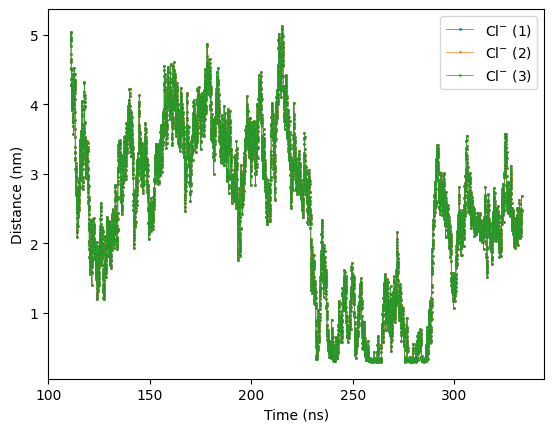

In [10]:
marker = ["o", "v", ">", "D", "p", "X", "s"]
#ploting first residue
for i in range(nCl):
    
    plt.plot(time, distance[0][i],linewidth=0.5,\
             marker=marker[i], markersize=1, markerfacecolor="k", label='Cl$^{-}$ (%d)' %(i+1))
plt.xlabel('Time (ns)')
plt.ylabel('Distance (nm)')
#plt.legend(ncol=2,frameon=True, fontsize=5, numpoints=1)
plt.legend()
#plt.xlim(0.78, 1.06)
#plt.savefig("Rg_possibility.pdf", format="pdf")
plt.show()
#plt.close()

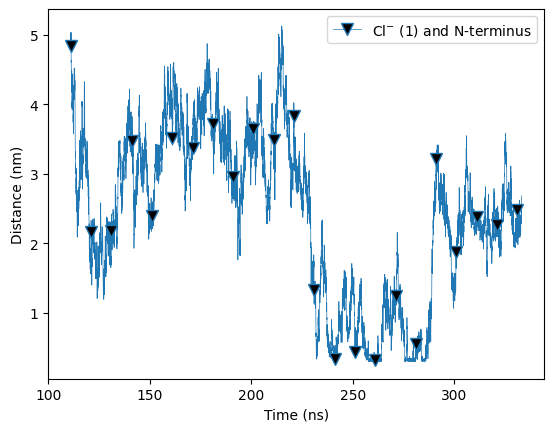

In [11]:
plt.plot(time, distance[0][0],linewidth=0.5,\
             marker="v", markevery=500, markersize=8, markerfacecolor="k",label='Cl$^{-}$ (1) and N-terminus')
plt.xlabel('Time (ns)')
plt.ylabel('Distance (nm)')
#plt.legend(ncol=2,frameon=True, fontsize=5, numpoints=1)
plt.legend()
#plt.xlim(0.78, 1.06)
plt.savefig("Distance_RES1.pdf", format="pdf")
plt.show()
#plt.close()

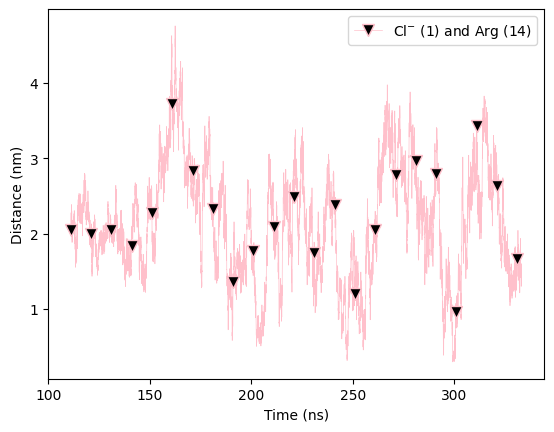

In [12]:
plt.plot(time, distance[1][0],linewidth=0.5,\
             marker="v", markevery=500, markersize=8, markerfacecolor="k", color='pink', label='Cl$^{-}$ (1) and Arg (14)')
plt.xlabel('Time (ns)')
plt.ylabel('Distance (nm)')
#plt.legend(ncol=2,frameon=True, fontsize=5, numpoints=1)
plt.legend()
#plt.xlim(0.78, 1.06)
plt.savefig("Distance_RES2.pdf", format="pdf")
plt.show()
#plt.close()

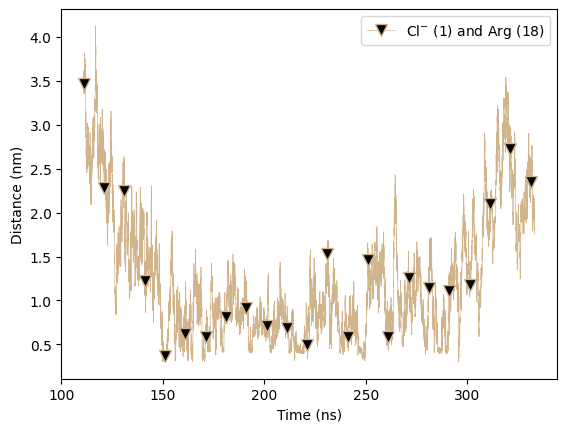

In [13]:
plt.plot(time, distance[2][0],linewidth=0.5,\
             marker="v", markevery=500, markersize=8, markerfacecolor="k", color='tan', label='Cl$^{-}$ (1) and Arg (18)')
plt.xlabel('Time (ns)')
plt.ylabel('Distance (nm)')
#plt.legend(ncol=2,frameon=True, fontsize=5, numpoints=1)
plt.legend()
#plt.xlim(0.78, 1.06)
plt.savefig("Distance_RES3.pdf", format="pdf")
plt.show()
#plt.close()